In [245]:
import time
st = time.time()

In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split

In [247]:
df = pd.read_csv('/content/drive/MyDrive/most_subscribed_youtube_channels.csv', index_col=0)
df

,Youtuber,subscribers,video views,video count,category,started
rank,,,,,,
1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
5,Music,"116,000,000",0,0,NaN,2013
...,...,...,...,...,...,...
996,JP Plays,"10,900,000","4,609,300,218","3,528",Gaming,2014
997,TrapMusicHDTV,"10,900,000","4,070,521,973",690,Music,2013
998,Games EduUu,"10,900,000","3,093,784,767","1,006",Gaming,2011


In [248]:
df = df.drop(['Youtuber'],axis=1)
df

,subscribers,video views,video count,category,started
rank,,,,,
1,"222,000,000","198,459,090,822","17,317",Music,2006
2,"154,000,000",0,0,Film & Animation,2015
3,"140,000,000","135,481,339,848",786,Education,2006
4,"139,000,000","125,764,252,686","91,271",Shows,2006
5,"116,000,000",0,0,NaN,2013
...,...,...,...,...,...
996,"10,900,000","4,609,300,218","3,528",Gaming,2014
997,"10,900,000","4,070,521,973",690,Music,2013
998,"10,900,000","3,093,784,767","1,006",Gaming,2011


In [249]:
df.isnull().sum()

subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [250]:
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df[['category']])
df

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,subscribers,video views,video count,category,started
rank,,,,,
1,"222,000,000","198,459,090,822","17,317",8,2006
2,"154,000,000",0,0,4,2015
3,"140,000,000","135,481,339,848",786,2,2006
4,"139,000,000","125,764,252,686","91,271",14,2006
5,"116,000,000",0,0,18,2013
...,...,...,...,...,...
996,"10,900,000","4,609,300,218","3,528",5,2014
997,"10,900,000","4,070,521,973",690,8,2013
998,"10,900,000","3,093,784,767","1,006",5,2011


In [251]:
imputer = SimpleImputer(strategy='mean')
df['category'] = imputer.fit_transform(df[['category']])
df

,subscribers,video views,video count,category,started
rank,,,,,
1,"222,000,000","198,459,090,822","17,317",8.0,2006
2,"154,000,000",0,0,4.0,2015
3,"140,000,000","135,481,339,848",786,2.0,2006
4,"139,000,000","125,764,252,686","91,271",14.0,2006
5,"116,000,000",0,0,18.0,2013
...,...,...,...,...,...
996,"10,900,000","4,609,300,218","3,528",5.0,2014
997,"10,900,000","4,070,521,973",690,8.0,2013
998,"10,900,000","3,093,784,767","1,006",5.0,2011


In [252]:
cols_to_change = ['subscribers','video views','video count']
for col in cols_to_change:
  df[col] = df[col].str.replace(',', '')

In [253]:
df

,subscribers,video views,video count,category,started
rank,,,,,
1,222000000,198459090822,17317,8.0,2006
2,154000000,0,0,4.0,2015
3,140000000,135481339848,786,2.0,2006
4,139000000,125764252686,91271,14.0,2006
5,116000000,0,0,18.0,2013
...,...,...,...,...,...
996,10900000,4609300218,3528,5.0,2014
997,10900000,4070521973,690,8.0,2013
998,10900000,3093784767,1006,5.0,2011


In [254]:
# for col in cols_to_change:
#   df[col] = df[col].str.strip('.')

In [255]:
df

,subscribers,video views,video count,category,started
rank,,,,,
1,222000000,198459090822,17317,8.0,2006
2,154000000,0,0,4.0,2015
3,140000000,135481339848,786,2.0,2006
4,139000000,125764252686,91271,14.0,2006
5,116000000,0,0,18.0,2013
...,...,...,...,...,...
996,10900000,4609300218,3528,5.0,2014
997,10900000,4070521973,690,8.0,2013
998,10900000,3093784767,1006,5.0,2011


In [256]:
df.isnull().sum()

subscribers    0
video views    0
video count    0
category       0
started        0
dtype: int64

In [257]:
column_name = df.columns
column_name

Index(['subscribers', 'video views', 'video count', 'category', 'started'], dtype='object')

In [258]:
print(df.dtypes)

subscribers     object
video views     object
video count     object
category       float64
started          int64
dtype: object


In [259]:
df['subscribers'] = df['subscribers'].astype(str).astype(float)
df['video views'] = df['video views'].astype(str).astype(int)
df['video count'] = df['video count'].astype(str).astype(int)

In [260]:
print(df.dtypes)

subscribers    float64
video views      int64
video count      int64
category       float64
started          int64
dtype: object


In [261]:
print(np.dtype(df['video count']))

int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


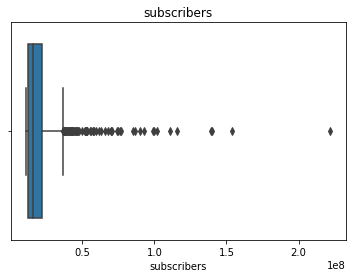

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


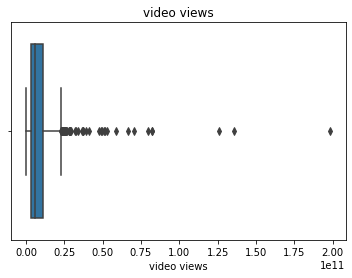

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


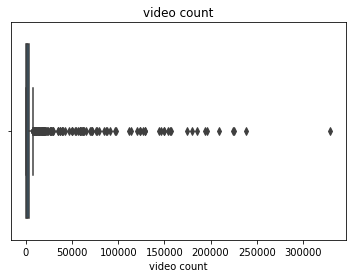

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


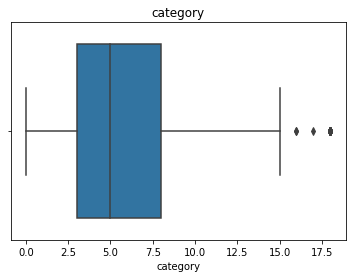

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


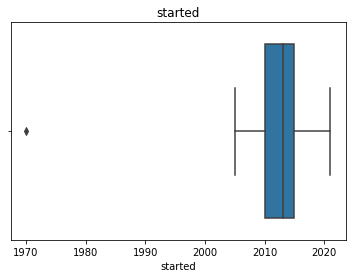

In [262]:
for boxcol in column_name:
  box = sns.boxplot(df[boxcol])
  plt.title(boxcol)
  plt.show(box)
  # fig, ax = plt.subplots(figsize = (18,10))
  # plt.title(boxcol)
  # ax.scatter(df[boxcol], df['video views'])
  # plt.show()

In [263]:
categoryoutl = np.where(df['category']>15)
startedoutl = np.where(df['started']<2000)
suboutl = np.where(df['subscribers']>0.5)
vwoutl = np.where(df['video views']>0.5)
print('Category')
print(categoryoutl)
print('Started')
print(startedoutl)
print('Subscribers')
print(suboutl)
print('Video Views')
print(vwoutl)

Category
(array([  4,   9,  15,  71,  81,  97, 137, 163, 180, 202, 260, 293, 316,
       331, 401, 433, 505, 507, 689, 699, 780, 803, 821, 833, 839, 863,
       960, 966, 977, 984]),)
Started
(array([99]),)
Subscribers
(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140

In [264]:
df.shape

(1000, 5)

In [265]:
for f in categoryoutl:
  df.drop(f, inplace=True)
for g in startedoutl:
  df.drop(g, inplace=True)
for j in suboutl:
  try:
    df.drop(j, inplace=True)
  except:
    pass
for k in vwoutl:
  try:
    df.drop(k, inplace=True)
  except:
    pass

In [266]:
df.shape

(969, 5)

In [267]:
y = df['video views']
y = pd.DataFrame(y)
y

,video views
rank,
1,198459090822
2,0
3,135481339848
5,0
6,28469458228
...,...
996,4609300218
997,4070521973
998,3093784767


In [268]:
x = df.drop(['video views'], axis=1)
x

,subscribers,video count,category,started
rank,,,,
1,222000000.0,17317,8.0,2006
2,154000000.0,0,4.0,2015
3,140000000.0,786,2.0,2006
5,116000000.0,0,18.0,2013
6,111000000.0,4497,5.0,2010
...,...,...,...,...
996,10900000.0,3528,5.0,2014
997,10900000.0,690,8.0,2013
998,10900000.0,1006,5.0,2011


In [269]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, train_size=.8, shuffle=True)

In [270]:
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler ,RobustScaler
from sklearn.linear_model import LinearRegression

In [271]:
x_tr.shape, x_ts.shape, y_tr.shape, y_ts.shape

((775, 4), (194, 4), (775, 1), (194, 1))

In [272]:
def my_modelfit(my_model,my_x_train,my_y_train):
  my_model.fit(my_x_train, my_y_train.values.ravel())
def my_predict(my_model,my_x_test):
  y_pred = my_model.predict(my_x_test)
  return y_pred
def my_r2_score(my_y_test,my_y_pred):
  r2 = r2_score(my_y_test, my_y_pred)
  return r2

In [273]:
def cr_scaler(my_scaler,my_x_train,my_x_test):
  my_scaler.fit_transform(my_x_train)
  my_scaler.fit_transform(my_x_test)

In [274]:
clf1 = SVR(kernel= 'linear',C=25)
clf2 = KNeighborsRegressor(n_neighbors=25) 
clf3 = DecisionTreeRegressor()
clf4 = RandomForestRegressor()
clf5 = SVR(kernel= 'rbf',C=25)
clf5 = LinearSVR()
clf6 = LinearRegression()
clf7 = VotingRegressor(
                       estimators=[('knr', clf2), ('rfr', clf3), ('svr2', clf4), ('lsvr', clf5), ('lr', clf6)]
                      )
clf8 = BaggingRegressor(clf3, n_estimators=10, max_samples=.8, n_jobs=-1) #For all cpu use n_jobs = -1
clf9 = GradientBoostingRegressor()
Sscaler = StandardScaler()
Rscaler = RobustScaler()

In [275]:
cr_scaler(Sscaler, x_tr, x_ts)

my_modelfit(clf2, x_tr, y_tr)
y_pred_res2 = my_predict(clf2,x_ts)
print(my_r2_score(y_ts,y_pred_res2))

my_modelfit(clf3, x_tr, y_tr)
y_pred_res3 = my_predict(clf3,x_ts)
print(my_r2_score(y_ts,y_pred_res3))

my_modelfit(clf4, x_tr, y_tr)
y_pred_res4 = my_predict(clf4,x_ts)
print(my_r2_score(y_ts,y_pred_res4))

my_modelfit(clf5, x_tr, y_tr)
y_pred_res5 = my_predict(clf5,x_ts)
print(my_r2_score(y_ts,y_pred_res5))

my_modelfit(clf6, x_tr, y_tr)
y_pred_res6 = my_predict(clf6,x_ts)
print(my_r2_score(y_ts,y_pred_res6))

my_modelfit(clf7, x_tr, y_tr)
y_pred_res7 = my_predict(clf7,x_ts)
print(my_r2_score(y_ts,y_pred_res7))

my_modelfit(clf8, x_tr, y_tr)
y_pred_res8 = my_predict(clf8,x_ts)
print(my_r2_score(y_ts,y_pred_res8))

my_modelfit(clf9, x_tr, y_tr)
y_pred_res9 = my_predict(clf9,x_ts)
print(my_r2_score(y_ts,y_pred_res9))

0.29983962893168603
0.7869952522225225
0.6291883810751792
0.18643703968158876
0.6570039205040821


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.5799135644991298
0.5826941083973319
0.6152831631347144


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [276]:
cr_scaler(Rscaler, x_tr, x_ts)

my_modelfit(clf2, x_tr, y_tr)
y_pred_res2 = my_predict(clf2,x_ts)
print(my_r2_score(y_ts,y_pred_res2))

my_modelfit(clf3, x_tr, y_tr)
y_pred_res3 = my_predict(clf3,x_ts)
print(my_r2_score(y_ts,y_pred_res3))

my_modelfit(clf4, x_tr, y_tr)
y_pred_res4 = my_predict(clf4,x_ts)
print(my_r2_score(y_ts,y_pred_res4))

my_modelfit(clf5, x_tr, y_tr)
y_pred_res5 = my_predict(clf5,x_ts)
print(my_r2_score(y_ts,y_pred_res5))

my_modelfit(clf6, x_tr, y_tr)
y_pred_res6 = my_predict(clf6,x_ts)
print(my_r2_score(y_ts,y_pred_res6))

my_modelfit(clf7, x_tr, y_tr)
y_pred_res7 = my_predict(clf7,x_ts)
print(my_r2_score(y_ts,y_pred_res7))

my_modelfit(clf8, x_tr, y_tr)
y_pred_res8 = my_predict(clf8,x_ts)
print(my_r2_score(y_ts,y_pred_res8))

my_modelfit(clf9, x_tr, y_tr)
y_pred_res9 = my_predict(clf9,x_ts)
print(my_r2_score(y_ts,y_pred_res9))

0.29983962893168603
0.7858212691890757
0.5961335960439986
-0.1732071620050024
0.6570039205040821


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.6610220485474642
0.5937072837125926
0.5504085993521658


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [277]:
end = time.time()
print((end-st)/60)

0.053175270557403564
